In [58]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h2>Using read_csv function to read CSV file and storing in riverkeeper object</h2>

In [59]:
riverkeeper = pd.read_csv('riverkeeper_data_2013.csv',parse_dates=['Date'])

<h2>Now printing five lines</h2>

In [60]:
riverkeeper[15:20]

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
15,Hudson above Mohawk River,2011-07-14,11,0.3,35
16,Hudson above Mohawk River,2011-07-02,11,2.1,35
17,Hudson above Mohawk River,2011-05-19,91,1.6,35
18,Hudson above Mohawk River,2010-10-16,>2420,1.3,35
19,Hudson above Mohawk River,2010-09-14,15,0.0,35


<h2>Now we need to remove greater than and less than sign from EnteroCount column values </h2>

In [61]:
riverkeeper.EnteroCount = riverkeeper.EnteroCount.str.replace('>','')  
riverkeeper.EnteroCount = riverkeeper.EnteroCount.str.replace('<','')

<h2>Printing same values to see if > sign removed</h2>

In [62]:
riverkeeper[15:20]

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
15,Hudson above Mohawk River,2011-07-14,11,0.3,35
16,Hudson above Mohawk River,2011-07-02,11,2.1,35
17,Hudson above Mohawk River,2011-05-19,91,1.6,35
18,Hudson above Mohawk River,2010-10-16,2420,1.3,35
19,Hudson above Mohawk River,2010-09-14,15,0.0,35


In [63]:
riverkeeper.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                 object
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

<h2>Converting last two columns as int</h2>

In [64]:
riverkeeper.EnteroCount = riverkeeper.EnteroCount.apply(int)           
riverkeeper.FourDayRainTotal = riverkeeper.FourDayRainTotal.apply(int) 
riverkeeper.SampleCount = riverkeeper.SampleCount.apply(int)
riverkeeper.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal             int64
SampleCount                  int64
dtype: object

<h1>Create lists & graphs of the best and worst places to swim in the dataset.</h1>

<h2>Grouping by site name and getting average</h2>

In [65]:
siteData = riverkeeper.groupby(['Site'], as_index=False).mean()
siteData[1:5]

,Site,EnteroCount,FourDayRainTotal,SampleCount
1,79th St. mid-channel,47.204082,0.612245,49.0
2,Albany Rowing Dock,280.944444,0.361111,36.0
3,Annesville Creek,83.421053,0.263158,38.0
4,Athens,201.314286,0.371429,35.0


<h2> Sorting by EnteroCount to get best ten places to swim </h2>

In [66]:
givenData = siteData.sort_values(by='EnteroCount')[0:10]
givenData

,Site,EnteroCount,FourDayRainTotal,SampleCount
59,Poughkeepsie Drinking Water Intake,8.342105,0.157895,38.0
17,Croton Point Beach,15.458333,0.270833,48.0
64,Stony Point mid-channel,17.340909,0.250000,44.0
42,Little Stony Point,17.526316,0.157895,38.0
60,Poughkeepsie Launch Ramp,17.675676,0.135135,37.0
32,Haverstraw Bay mid-channel,18.708333,0.250000,48.0
65,TZ Bridge mid-channel,21.438596,0.508772,57.0
14,Cold Spring Harbor,22.542857,0.114286,35.0
74,Yonkers mid-channel,25.019231,0.519231,52.0
37,Irvington Beach,28.805556,0.250000,36.0


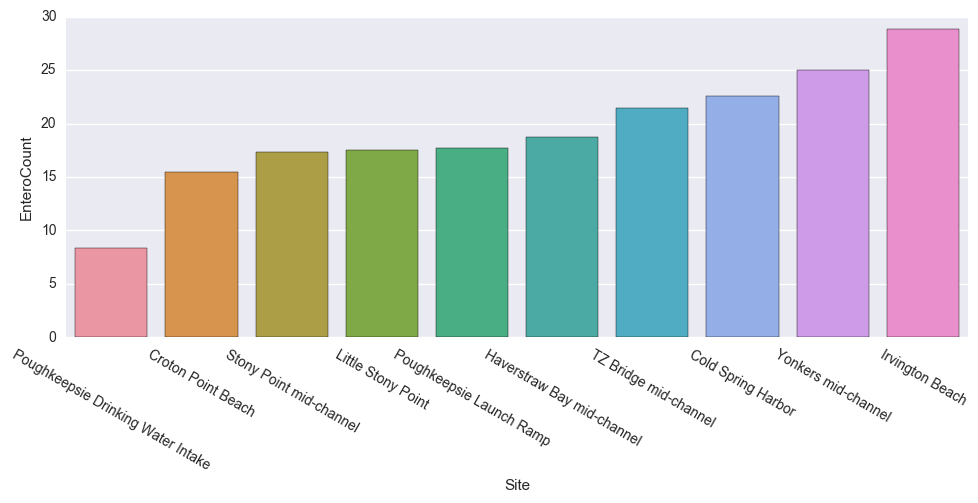

In [67]:

sns.factorplot('Site', 'EnteroCount', data=givenData, aspect = 2.5, kind='bar', order=givenData['Site'].values).set_xticklabels(rotation=-30)

<h2>Sorting by EnteroCount by descending order to get most count number first</h2>

In [68]:
worstPlacesToSwim = siteData.sort_values(by='EnteroCount', ascending=False).reset_index()
worstPlacesToSwim[0:10]

,index,Site,EnteroCount,FourDayRainTotal,SampleCount
0,29,Gowanus Canal,4206.837838,0.648649,37.0
1,48,Newtown Creek- Metropolitan Ave. Bridge,2953.684211,0.614035,57.0
2,66,Tarrytown Marina,2205.666667,0.592593,27.0
3,63,Saw Mill River,1455.760000,0.520000,50.0
4,70,Upper Sparkill Creek,1296.072727,0.327273,165.0
5,47,Newtown Creek- Dutch Kills,1205.087719,0.614035,57.0
6,39,Kingsland Pt. Park- Pocantico River,907.857143,0.404762,42.0
7,53,Orangetown STP Outfall,854.192982,0.456140,57.0
8,45,Mohawk River at Waterford,621.057143,0.371429,35.0
9,57,Piermont Pier,482.165775,0.336898,187.0


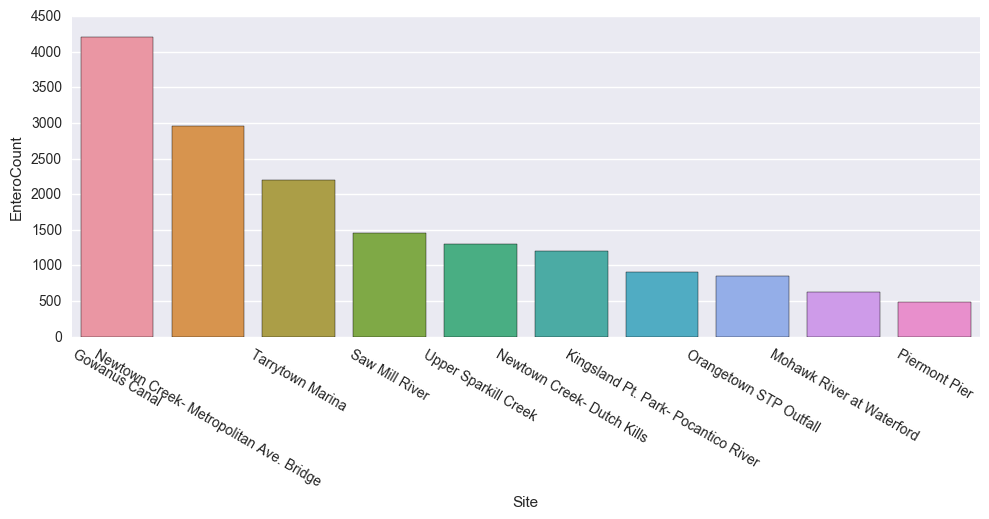

In [69]:
givenData=worstPlacesToSwim[0:10]

sns.factorplot('Site', 'EnteroCount', data=givenData, aspect = 2.5, kind='bar', order=givenData['Site'].values).set_xticklabels(rotation=-30)

<h1>The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.</h1>

In [70]:
import datetime

sitelist = ['East River mid-channel at Roosevelt Is.', 'Esopus Creek West', 'Norrie Point Yacht Basin',
            'North River STP at 145th', 'Nyack Launch Ramp', 'The Battery mid-channel', 'Yonkers mid-channel']

Question2Data = riverkeeper[riverkeeper['Site'].isin(sitelist)]
givenData.loc[:,'MonthYear'] = pd.to_datetime(Question2Data.loc[:,'Date'])

In [72]:

sns.set_palette("deep", desat=.6)

givenData = Question2Data

#new Column addd
givenData.loc[:,'MonthYear'] = givenData.loc[:,'Date'].apply(lambda x : datetime.date(x.year, x.month, 1))
givenData[1:5]

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,MonthYear
694,Esopus Creek West,2012-06-15,2,0,42,2012-06-01
695,Esopus Creek West,2013-10-20,8,0,42,2013-10-01
696,Esopus Creek West,2013-09-21,13,0,42,2013-09-01
697,Esopus Creek West,2013-08-18,17,0,42,2013-08-01


In [74]:
#making sum
givenData = givenData.groupby(by=['Site','MonthYear'], as_index=False).sum()

<h2>Plotting site data showing gaps in reading </h2>

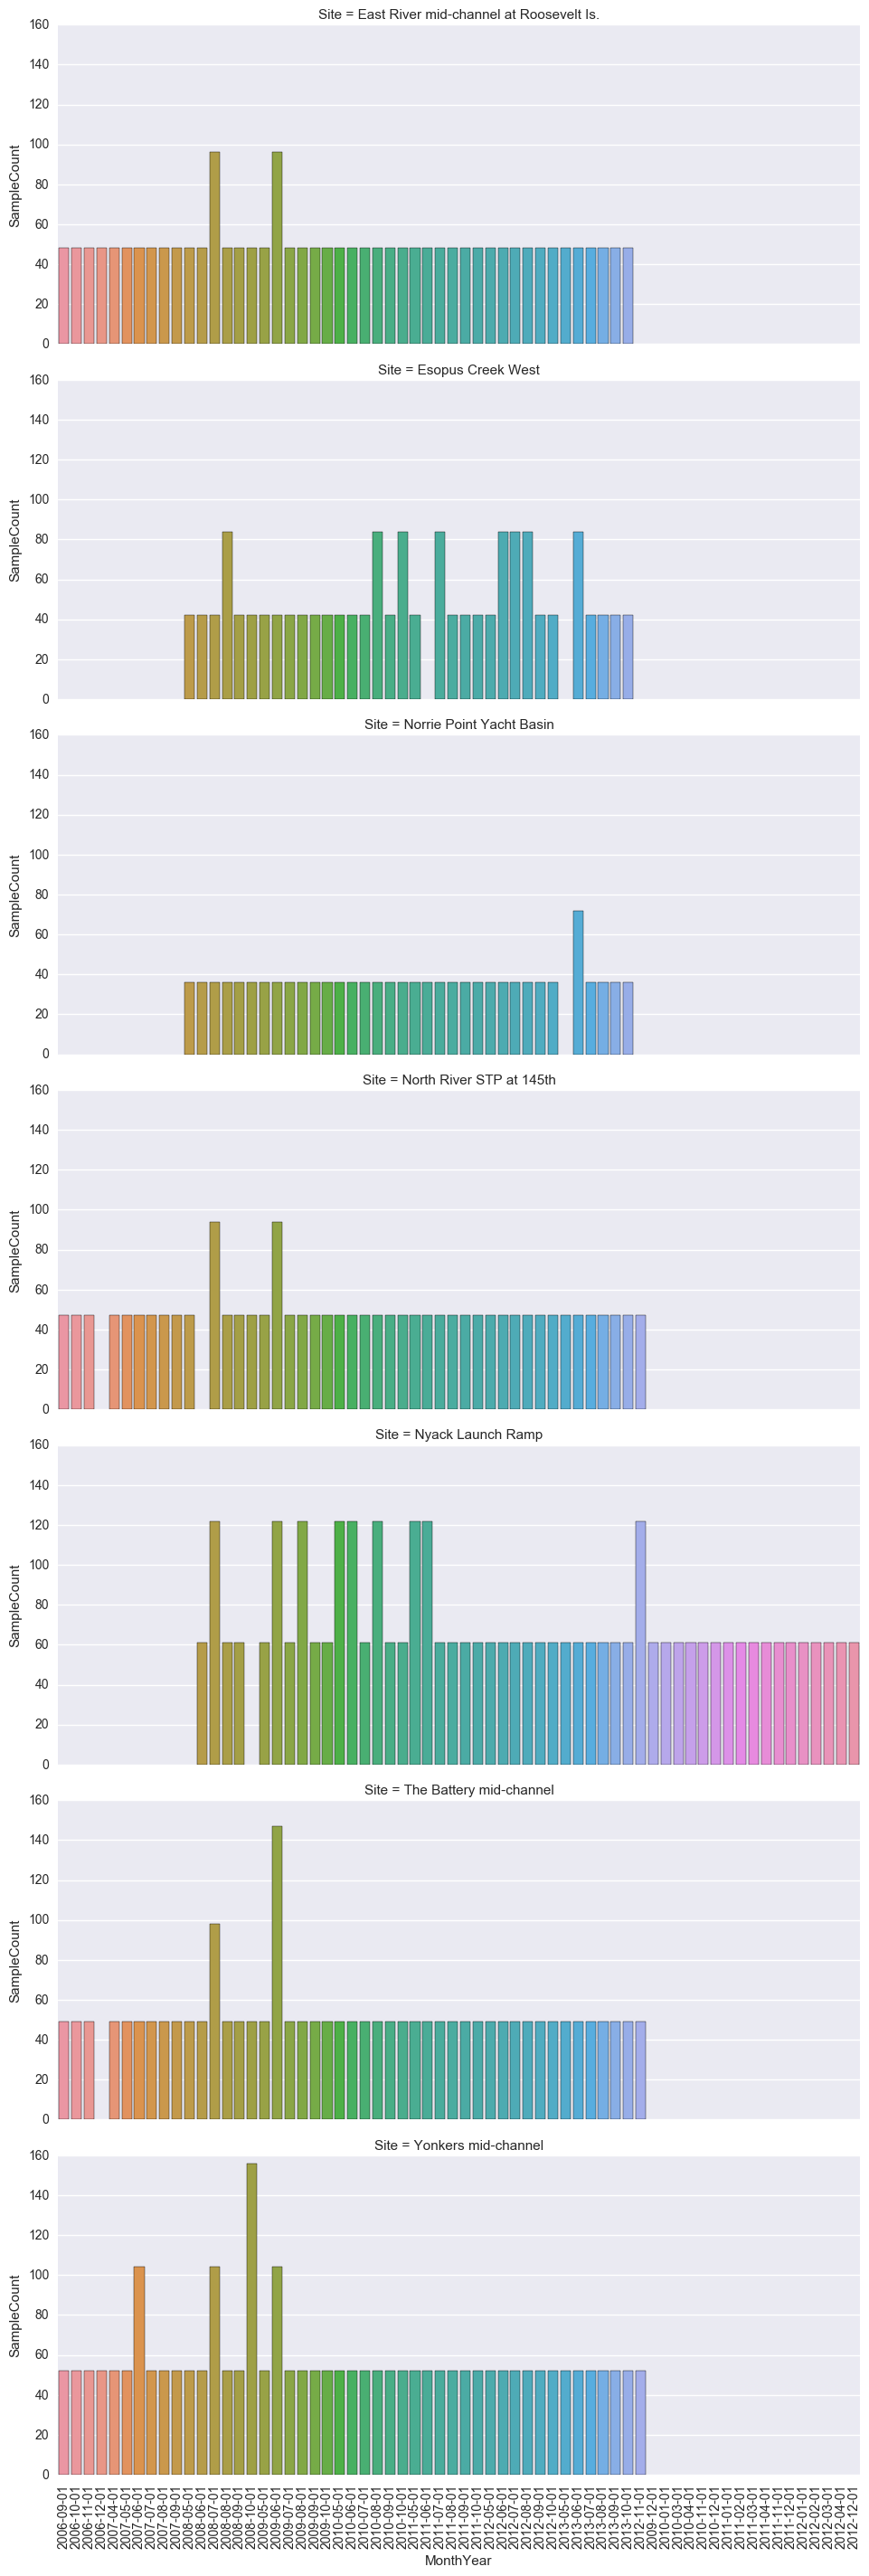

In [75]:
sns.factorplot(x='MonthYear', y='SampleCount', data=givenData, row='Site', aspect = 2.5, kind='bar').set_xticklabels(rotation=90)

<h1>Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.</h1>

<h2> Printing 10 rows </h2>

In [77]:
siteData[0:10]

,Site,EnteroCount,FourDayRainTotal,SampleCount
0,125th St. Pier,179.696970,0.500000,66.0
1,79th St. mid-channel,47.204082,0.612245,49.0
2,Albany Rowing Dock,280.944444,0.361111,36.0
3,Annesville Creek,83.421053,0.263158,38.0
4,Athens,201.314286,0.371429,35.0
5,Beacon Harbor,52.657895,0.157895,38.0
6,Bethlehem Launch Ramp,231.694444,0.333333,36.0
7,"Castle Point, NJ",37.076923,0.410256,39.0
8,Castleton,186.000000,0.342857,35.0
9,Catskill Creek- East End,261.238095,0.309524,42.0


<h2> By looking at above 10 rows; it is not clear if there is any relationship betweeen rain and EnteroCount </h2>

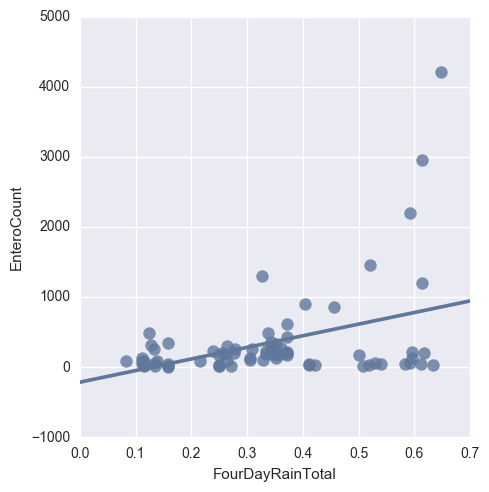

In [79]:
sns.lmplot(data=siteData, x='FourDayRainTotal', y='EnteroCount',ci=None, scatter_kws={"s": 80})

<h2>I expected with more rain, water quality to be better ( means less EnteroCount ) but that is not case here </h2>